In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

with open('D:/codes/Raman_code/Dataset/DEEPER/axis.txt') as file:
    lines = [line.rstrip() for line in file]
wavenumbers = [float(wave) for wave in lines if wave != '']

input_noisy = np.load('dataset/baseline_npy/Test_baselinInputs.npy')
output_GT = np.load('dataset/baseline_npy/Test_baselinOutputs.npy')
SMAE_pred = np.load('output_npy/SMAE_pretrain_denoised_baseline.npy')

'''
spectra_num = len(Input)
train_split = round(0.8*spectra_num)
test_split = round(0.2*spectra_num)
input_train = Input[:train_split]
input_test = Input[train_split:train_split+test_split]
output_train = Output[:train_split]
output_test = Output[train_split:train_split+test_split]
'''
'''
spectra_num = len(input_noisy)
train_split = round(0.8 * spectra_num)
test_split = round(0.2 * spectra_num)
input_noisy = input_noisy[train_split : train_split + test_split]
output_GT = output_GT[train_split : train_split + test_split]
'''

In [2]:
def computing_SNR(inputData, outputData, ):
    snr_total = []
    N = 500
    for i in range(inputData.shape[0]):
        x, y = inputData[i], outputData[i]
        noise_power = (1 / N) * np.sum(np.square(x))
        signal_power = (1 / N) * np.sum(np.square(y - x))

        snr = 10 * np.log10(noise_power / signal_power)
        snr_total.append(snr)

    return np.mean(snr_total)

In [3]:
SMAE_pred.shape

(12694, 500)

In [5]:
SNR_mean = computing_SNR(SMAE_pred, output_GT)
SNR_mean

IndexError: index 2539 is out of bounds for axis 0 with size 2539

In [4]:
SMAE_mse = np.mean(np.mean((SMAE_pred - output_GT) ** 2, axis=1))
SMAE_mse

0.046423015415179084

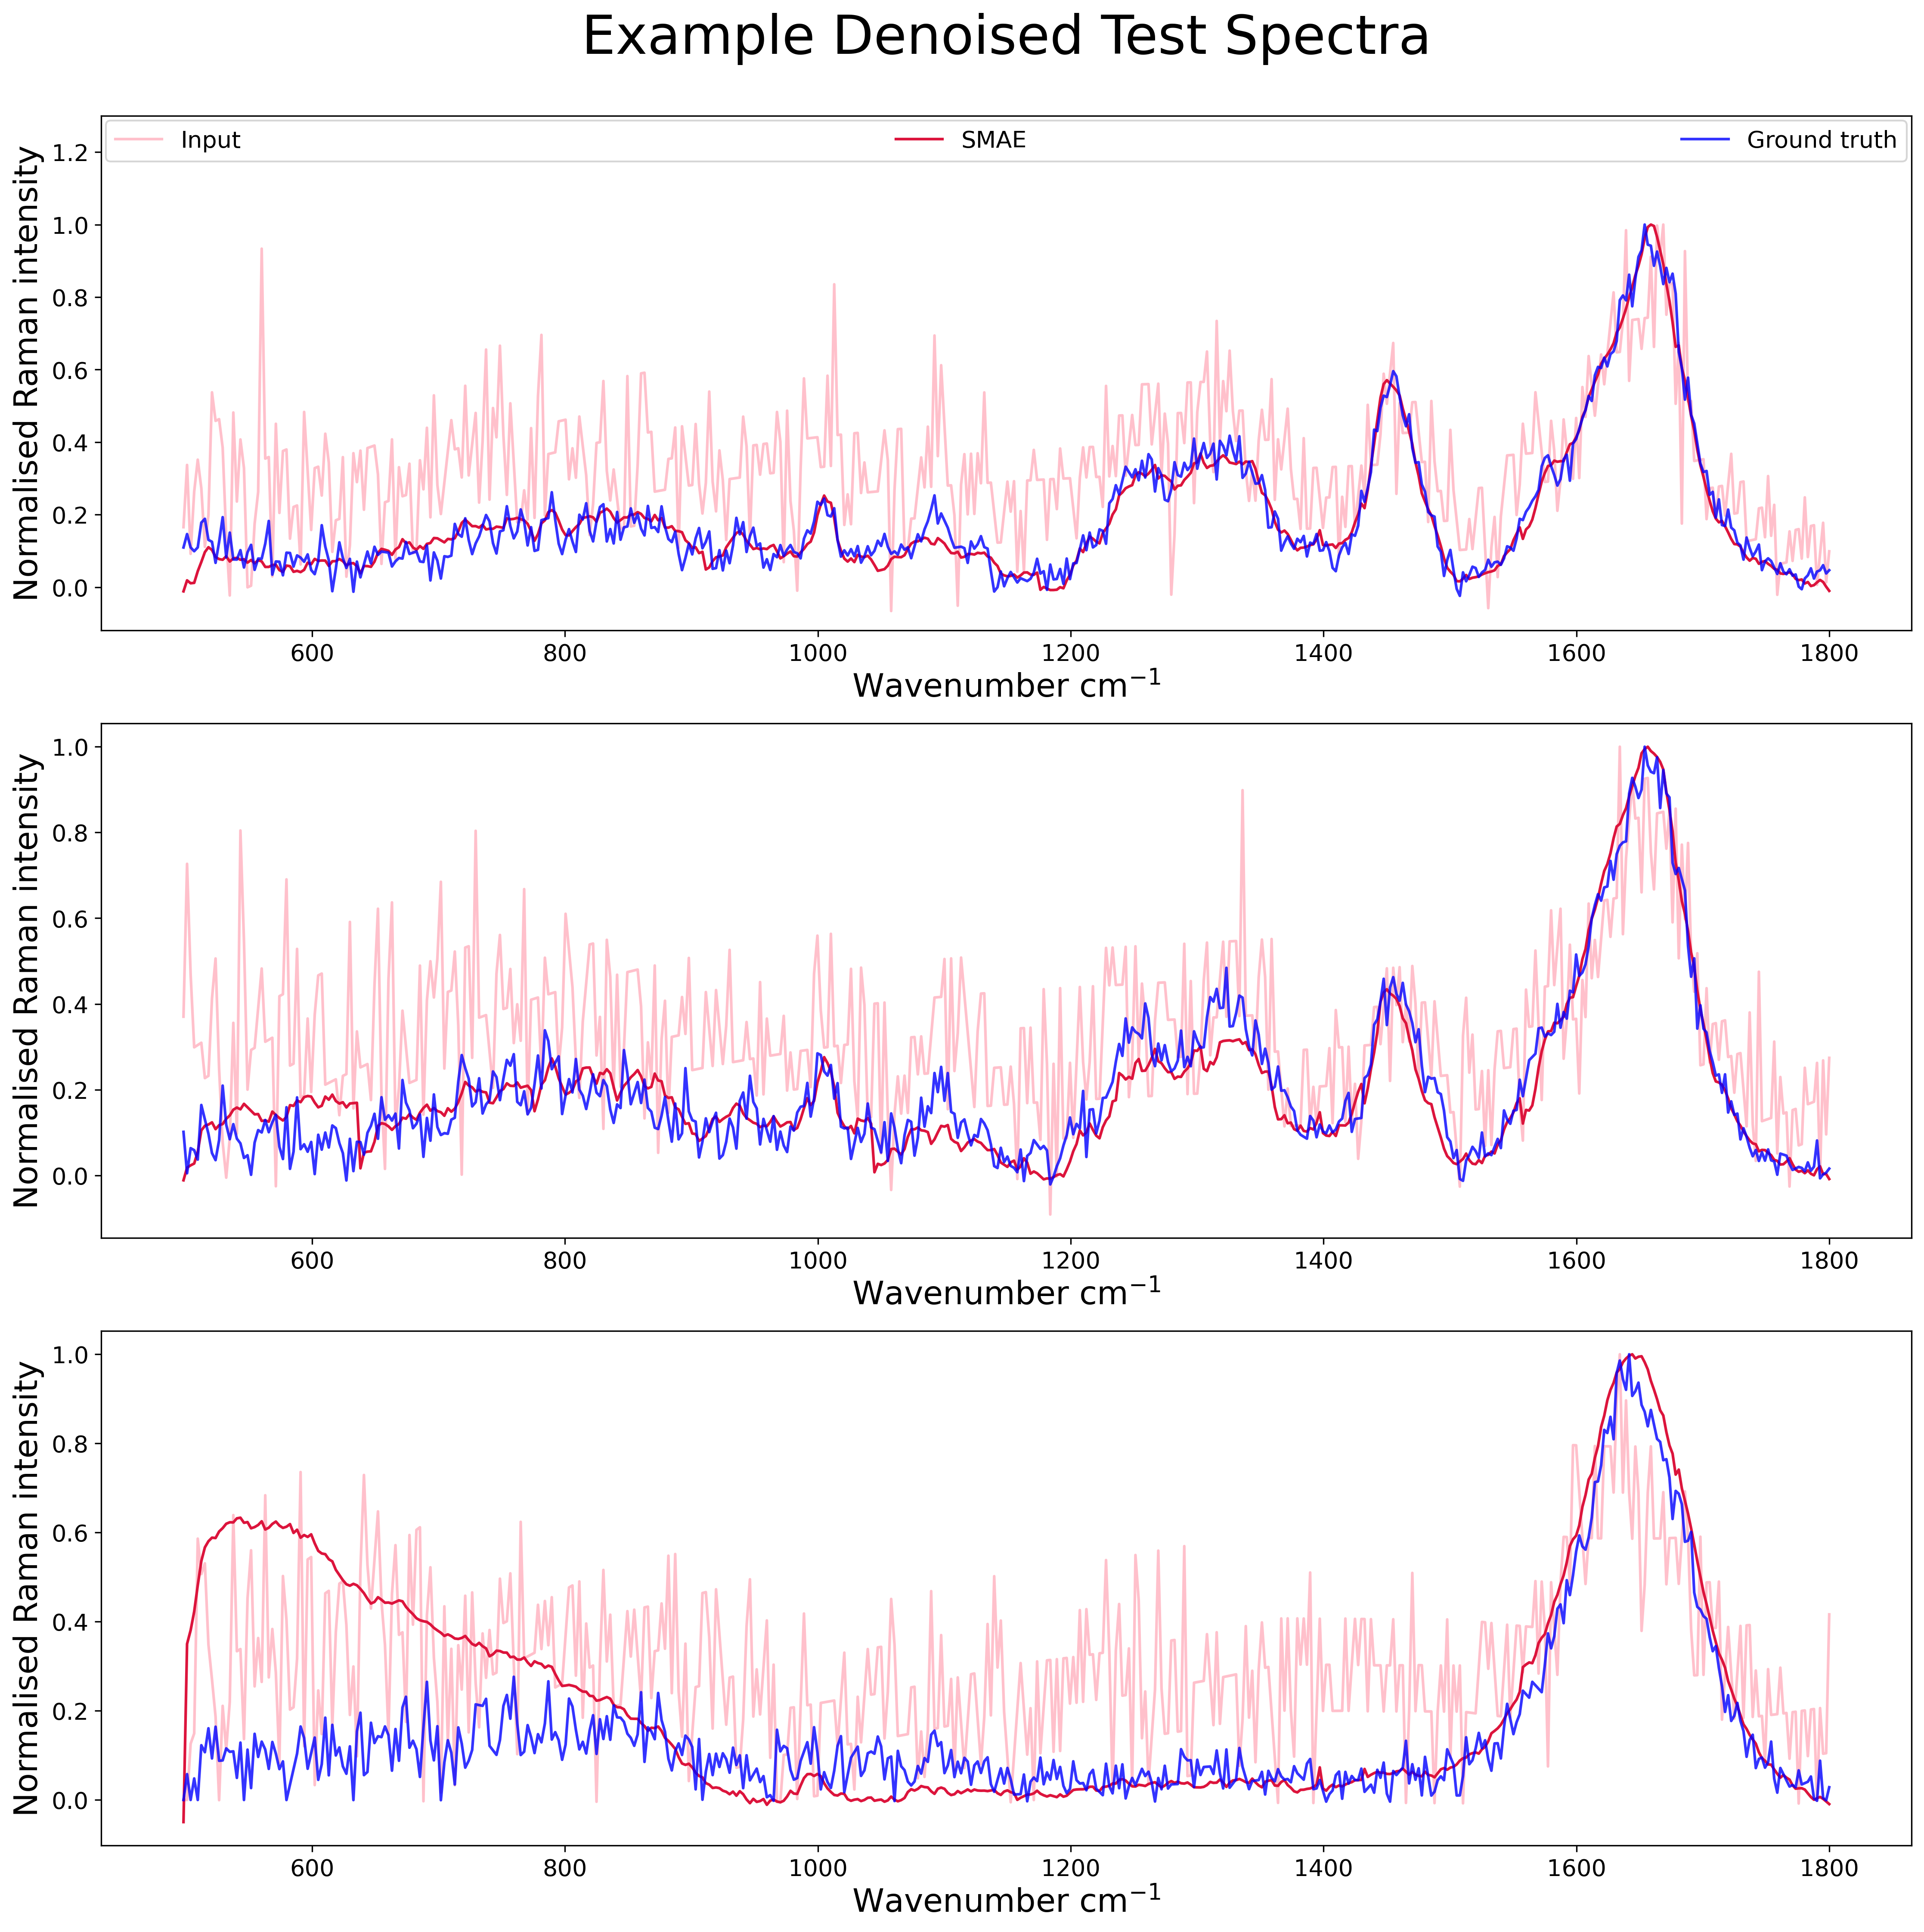

In [5]:
# plot example spectra for all techniques, using parameterisations derived from MCSE
example_inds=[4775,4000,6699] #6699

plot_num = len(example_inds)
fig, ax = plt.subplots(plot_num, figsize=(15, 15), dpi=300)
for i in range(plot_num):
    index = example_inds[i]
    ax[i].plot(wavenumbers, np.squeeze(input_noisy[index]), label='Input', color='pink')
    ax[i].plot(wavenumbers, np.squeeze(SMAE_pred[index]), label='SMAE', color='crimson')
    # ax[i].plot(wavenumbers, np.squeeze(cycleGAN_pred[index]), label='cycleGAN', color='green')
    ax[i].plot(wavenumbers, np.squeeze(output_GT[index]), label='Ground truth', alpha=0.8, color='blue')
    ax[i].set_ylabel('Normalised Raman intensity', fontsize = 18)
    ax[i].set_xlabel('Wavenumber cm$^{-1}$', fontsize = 18)
    ax[i].tick_params(axis='both', which='major', labelsize=13)
    if i == 0:
        ax[i].legend(loc='upper left',ncols=7, mode="expand", borderaxespad=0.2, fontsize = 13)
        ax[i].set_ylim(top=1.3)
ax[0].set_title('Example Denoised Test Spectra', fontsize = 30, y=1.1)
fig.tight_layout()